# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Import library's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Level3_ANN_heart_Prediction.csv")

In [8]:
data.head(100)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58.0,1,133,0,60,1,219000.00,1.0,141,1,0,83,0
96,63.0,1,514,1,25,1,254000.00,1.3,134,1,0,83,0
97,70.0,1,59,0,60,0,255000.00,1.1,136,0,0,85,0
98,60.0,1,156,1,25,1,318000.00,1.2,137,0,0,85,0


About the data (Description of attributes)

age: Age of the patient

anaemia: Haemoglobin level of patient (Boolean)

creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

diabetes: If the patient has diabetes (Boolean)

ejection_fraction: Percentage of blood leaving the heart at each contraction

high_blood_pressure: If the patient has hypertension (Boolean)

platelets: Platelet count of blood (kiloplatelets/mL)

serum_creatinine: Level of serum creatinine in the blood (mg/dL)

serum_sodium: Level of serum sodium in the blood (mEq/L)

sex: Sex of the patient

smoking: If the patient smokes or not (Boolean)

time: Follow-up period (days)

DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)

         [Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

0

# PROBLEM 1 :: Analyse the Dataset and pull out atleast 5 conclusions from it.

In [6]:
data.isnull().sum().sum()

0

data set have no any null value

Now split data in two part 
1st death event be 1
2nd death event be 0

In [9]:
data_d1 = data[data['DEATH_EVENT']==1]

In [10]:
data_d0 = data[data['DEATH_EVENT']==0]

here data_d1 represent data with death_event = 1and data_d0 represent data with death_event = 0

In [11]:
data_d1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


In [12]:
data_d0.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,58.761906,0.408867,540.054187,0.418719,40.266010,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901,0.0
std,10.637890,0.492840,753.799572,0.494569,10.859963,0.469579,97531.202283,0.654083,3.982923,0.478071,0.469579,67.742872,0.0
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,12.000000,0.0
25%,50.000000,0.000000,109.000000,0.000000,35.000000,0.000000,219500.000000,0.900000,135.500000,0.000000,0.000000,95.000000,0.0
50%,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263000.000000,1.000000,137.000000,1.000000,0.000000,172.000000,0.0
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.200000,140.000000,1.000000,1.000000,213.000000,0.0
max,90.000000,1.000000,5209.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000,285.000000,0.0


# Firsly  analyse Time 

visualise time dataset

Text(0, 0.5, 'age')

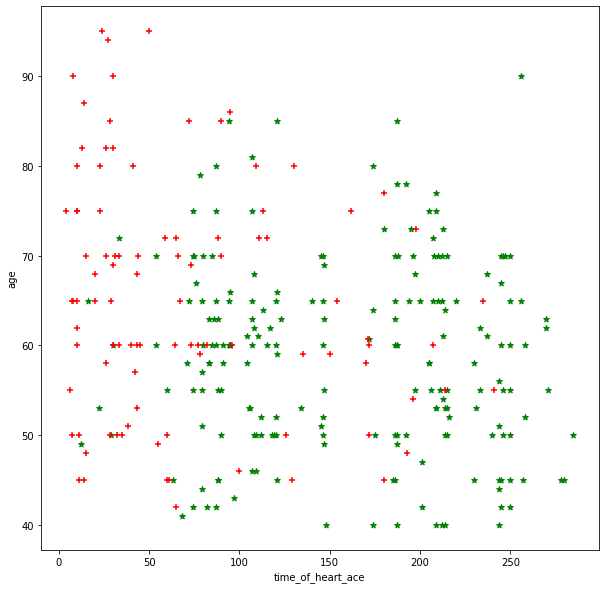

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(data_d0.time,data_d0.age,color = 'g',marker = "*")
plt.scatter(data_d1.time,data_d1.age,color = 'red',marker = "+")
plt.xlabel("time_of_heart_ace")
plt.ylabel("age")


from this scattter plot we will concluded if the time of heartadace is less then chance of death is more

# 2nd analyse age 

In [41]:
data_d1["age"].describe()

count    96.000000
mean     65.215281
std      13.214556
min      42.000000
25%      55.000000
50%      65.000000
75%      75.000000
max      95.000000
Name: age, dtype: float64

In [42]:
data_d0["age"].describe()

count    203.000000
mean      58.761906
std       10.637890
min       40.000000
25%       50.000000
50%       60.000000
75%       65.000000
max       90.000000
Name: age, dtype: float64

from here i concluded that there is no heartadace for age less than 40

# 3nd analyse platelets

Text(0, 0.5, 'time_of_heart_ace')

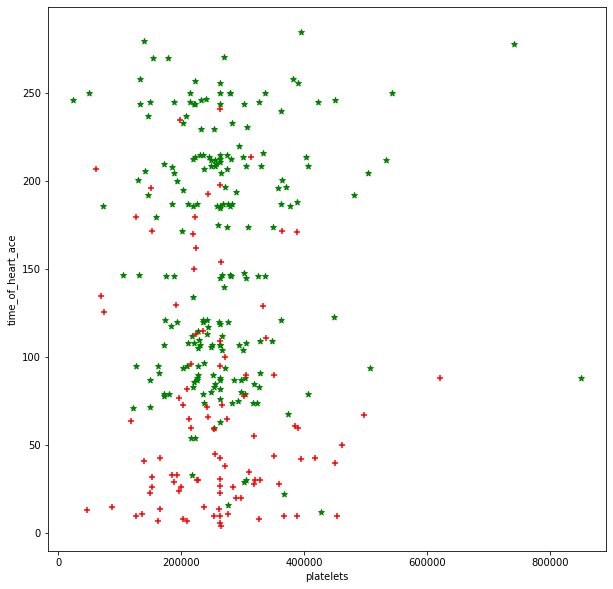

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(data_d0.platelets,data_d0.time,color = 'g',marker = "*")
plt.scatter(data_d1.platelets,data_d1.time,color = 'red',marker = "+")
plt.xlabel("platelets")
plt.ylabel("time_of_heart_ace")

# Preprocess the Dataset

In [88]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


rescale the data

Normalise data between 0 and 1

In [89]:
data1 = data.copy()

In [90]:
mini= min(data["age"])
mini

40.0

In [91]:
for i in data:
    mini = min(data1[i])
    maxi = max(data1[i])
    data1[i] =  (data1[i]-mini)/(maxi-mini)

In [92]:
data1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


In [93]:
data1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.449327,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.245552,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


Now everythings is between 0 and 1

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x = data1.drop(["DEATH_EVENT"],axis = 1)

In [96]:
y = data1.DEATH_EVENT

In [97]:
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle = True , test_size = 0.2)

In [98]:
x_train.shape

(239, 12)

In [99]:
y_train.shape

(239,)

In [100]:
x_train.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
282,0.036364,0.0,0.005231,0.0,0.242424,0.0,0.230210,0.370787,0.428571,1.0,1.0,0.875445
24,0.636364,0.0,0.071319,1.0,0.242424,1.0,0.288833,0.149438,0.600000,0.0,0.0,0.067616
198,0.181818,1.0,0.071319,1.0,0.090909,1.0,0.307795,0.056180,0.600000,0.0,0.0,0.647687
259,0.236364,0.0,0.004210,0.0,0.545455,0.0,0.342951,0.022472,0.628571,1.0,1.0,0.807829
13,0.181818,1.0,0.018500,0.0,0.363636,1.0,0.304158,0.067416,0.685714,1.0,0.0,0.024911


In [101]:
y_train.head(5)

282    0.0
24     1.0
198    0.0
259    0.0
13     1.0
Name: DEATH_EVENT, dtype: float64

In [102]:
from sklearn import svm

In [110]:
model_svm = svm.SVC()
model_svm.fit(x_train,y_train)

SVC()

In [120]:
y_pre = model_svm.predict(x_test)

In [113]:
model_svm.support_vectors_

array([[0.18181818, 1.        , 0.07131921, ..., 0.        , 0.        ,
        0.64768683],
       [0.54545455, 0.        , 0.00880327, ..., 0.        , 1.        ,
        0.24911032],
       [0.36363636, 0.        , 0.0093136 , ..., 0.        , 0.        ,
        0.32384342],
       ...,
       [0.6       , 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.69039146],
       [0.52727273, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.2455516 ],
       [0.50909091, 1.        , 0.0706813 , ..., 1.        , 0.        ,
        0.13879004]])

In [123]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix

In [121]:
confusion_matrix(y_test , y_pre)

array([[41,  1],
       [ 9,  9]], dtype=int64)

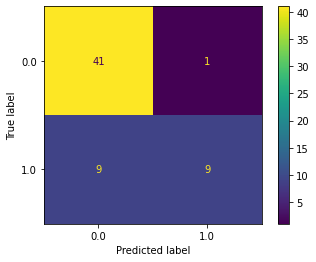

In [125]:
plot_confusion_matrix(model_svm , x_test,y_test)

In [126]:
model_svm.score(x_test , y_test)

0.8333333333333334

# Build a Artificial Neural Network



In [246]:
import tensorflow as tf

In [247]:
from tensorflow import keras
data1.

SyntaxError: invalid syntax (Temp/ipykernel_5376/3147903422.py, line 2)

In [ ]:
train_y = tf.keras.utils.to_categorical(y_train,2)
train_y.shape

In [ ]:
train_x = x_train
train_x.shape

In [248]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20 , activation  = "relu",input_shape = ([12])),
    tf.keras.layers.Dense(15 , activation  = "relu"),
    tf.keras.layers.Dense(15 , activation  = "relu"),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])

In [249]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.99):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [250]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
282,0.036364,0.0,0.005231,0.0,0.242424,0.0,0.230210,0.370787,0.428571,1.0,1.0,0.875445
24,0.636364,0.0,0.071319,1.0,0.242424,1.0,0.288833,0.149438,0.600000,0.0,0.0,0.067616
198,0.181818,1.0,0.071319,1.0,0.090909,1.0,0.307795,0.056180,0.600000,0.0,0.0,0.647687
259,0.236364,0.0,0.004210,0.0,0.545455,0.0,0.342951,0.022472,0.628571,1.0,1.0,0.807829
13,0.181818,1.0,0.018500,0.0,0.363636,1.0,0.304158,0.067416,0.685714,1.0,0.0,0.024911


In [251]:
y_train.head(2)

,DEATH_EVENT
282,0.0
24,1.0


In [252]:
y_train = pd.DataFrame(y_train)
y_train.shape

(239, 1)

In [253]:

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

history =  model.fit(x_train ,y_train, epochs = 2000,callbacks =[callbacks])

Epoch 1/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4268
Epoch 2/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5732
Epoch 3/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6653
Epoch 4/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6736
Epoch 5/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6736
Epoch 6/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6736
Epoch 7/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6736
Epoch 8/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6736
Epoch 9/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6736
Epoch 10/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6736
Epoch 11/2000
8/8 [

8/8 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8870
Epoch 84/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8828
Epoch 85/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8912
Epoch 86/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8912
Epoch 87/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8870
Epoch 88/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8828
Epoch 89/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8787
Epoch 90/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8870
Epoch 91/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.8912
Epoch 92/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8870
Epoch 93/2000
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9079
Epoch 166/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9079
Epoch 167/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9121
Epoch 168/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9079
Epoch 169/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9121
Epoch 170/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9121
Epoch 171/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9079
Epoch 172/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9121
Epoch 173/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9121
Epoch 174/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9121
Epoch 175/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9582
Epoch 248/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9540
Epoch 249/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9540
Epoch 250/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9582
Epoch 251/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9623
Epoch 252/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9623
Epoch 253/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9623
Epoch 254/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9498
Epoch 255/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9623
Epoch 256/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9582
Epoch 257/2000


8/8 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9707
Epoch 330/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9791
Epoch 331/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9707
Epoch 332/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9749
Epoch 333/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9833
Epoch 334/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9791
Epoch 335/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9791
Epoch 336/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9791
Epoch 337/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9791
Epoch 338/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9749
Epoch 339/2000


In [255]:
results = model.predict(x_test)


2/2 [==============================] - 0s 0s/step


In [258]:
for i in range(0,len(results)):
    if results[i]<0.5:
        results[i] = 0
    else :
        results[i] = 1
        

In [261]:
confusion_matrix(y_test,results)

array([[35,  7],
       [ 8, 10]], dtype=int64)